# Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import cross_validation
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot    
import plotly.graph_objs as go
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.cross_validation import train_test_split
import keras

/home/user/Stackroute/p3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


# Loading Data

In [2]:
white_wine = pd.read_csv("/home/user/Downloads/Wine/white.csv", sep=";",header=None)
red_wine = pd.read_csv("/home/user/Downloads/Wine/red.csv", sep=";",header=None)
red_wine.drop(red_wine.columns[0],axis=0,inplace=True)
white_wine.drop(white_wine.columns[0],axis=0,inplace=True)

# Fixing Parameters

In [ ]:
batch_size = 10
num_classes = 3
epochs = 10
z = [keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=3, verbose=1, mode='max')]

# Function for data operations

In [11]:
def data(white_wine):
    white_wine = white_wine.astype(float)
    #categorizing the data
    white1 = white_wine[white_wine[11]>=7]
    white1[11] = 2
    white2 = white_wine[(white_wine[11]>3) & (white_wine[11]<7)]
    white2[11] = 1
    white3 = white_wine[white_wine[11]<=3]
    white3[11] = 0
    white_2 = pd.DataFrame()
    white_2= pd.DataFrame(white_2.append([white1,white2,white3]))
    #test-train split
    x_train, x_test = train_test_split(white_2, train_size = 0.8)
    y_train = pd.DataFrame(x_train[11])
    y_test = pd.DataFrame(x_test[11])
    #y= np.array(pd.DataFrame(x_test[11]))
    x_train.drop(x_train.columns[11],axis=1,inplace=True)
    x_test.drop(x_test.columns[11],axis=1,inplace=True)
    x_train = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
    x_test = (x_test - x_test.mean()) / (x_test.max() - x_test.min())
    #converting data to numpy array
    xtrain = np.array(x_train.as_matrix(),dtype=np.float64)
    xtest=np.array(x_test.as_matrix(),dtype=np.float64)
    ytrain=np.array(y_train.as_matrix(),dtype=np.float64)
    ytest=np.array(y_test.as_matrix(),dtype=np.float64)
    ytrain = keras.utils.to_categorical(ytrain, num_classes)
    ytest = keras.utils.to_categorical(ytest, num_classes)

# Function for plotting the graph

In [7]:
def plotting(model_1):
    plt.plot(model_1.history['acc'])
    plt.plot(model_1.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(model_1.history['loss'])
    plt.plot(model_1.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Choosing the dataset

In [12]:
white_wine = data(white_wine)

/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

# Model 1 : 1 hidden layer

Train on 3134 samples, validate on 784 samples
Epoch 1/10
2s - loss: 0.4883 - acc: 0.7878 - val_loss: 0.5123 - val_acc: 0.7819
Epoch 2/10
2s - loss: 0.4514 - acc: 0.7993 - val_loss: 0.4667 - val_acc: 0.8189
Epoch 3/10
2s - loss: 0.4356 - acc: 0.7951 - val_loss: 0.4345 - val_acc: 0.8176
Epoch 4/10
3s - loss: 0.4327 - acc: 0.8025 - val_loss: 0.4790 - val_acc: 0.7793
Epoch 5/10
2s - loss: 0.4229 - acc: 0.8095 - val_loss: 0.4209 - val_acc: 0.8176
Epoch 6/10
2s - loss: 0.4159 - acc: 0.8114 - val_loss: 0.4435 - val_acc: 0.8112
Epoch 00005: early stopping


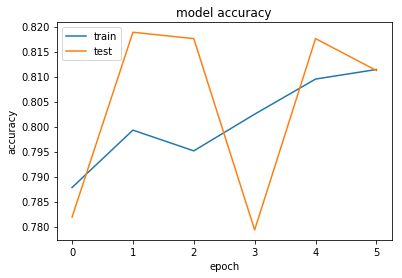

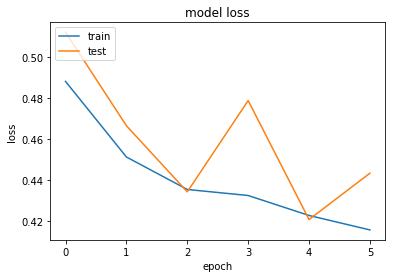

In [13]:
model1 = Sequential()
model1.add(Dense(600, activation='relu', input_shape=(11,)))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_1 = model1.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_1)

# Model 2 : 2 hidden layer

Train on 3134 samples, validate on 784 samples
Epoch 1/10
4s - loss: 0.4933 - acc: 0.7894 - val_loss: 0.4920 - val_acc: 0.7946
Epoch 2/10
4s - loss: 0.4553 - acc: 0.7945 - val_loss: 0.4425 - val_acc: 0.7946
Epoch 3/10
4s - loss: 0.4438 - acc: 0.8012 - val_loss: 0.5129 - val_acc: 0.8125
Epoch 4/10
5s - loss: 0.4252 - acc: 0.8121 - val_loss: 0.4409 - val_acc: 0.8138
Epoch 5/10
5s - loss: 0.4267 - acc: 0.8114 - val_loss: 0.4287 - val_acc: 0.8061
Epoch 6/10
5s - loss: 0.4246 - acc: 0.8082 - val_loss: 0.4097 - val_acc: 0.8304
Epoch 7/10
5s - loss: 0.4049 - acc: 0.8146 - val_loss: 0.4292 - val_acc: 0.8291
Epoch 8/10
5s - loss: 0.4083 - acc: 0.8162 - val_loss: 0.4298 - val_acc: 0.8214
Epoch 9/10
5s - loss: 0.3991 - acc: 0.8168 - val_loss: 0.4171 - val_acc: 0.8316
Epoch 10/10
5s - loss: 0.3953 - acc: 0.8271 - val_loss: 0.4418 - val_acc: 0.8214
Epoch 00009: early stopping


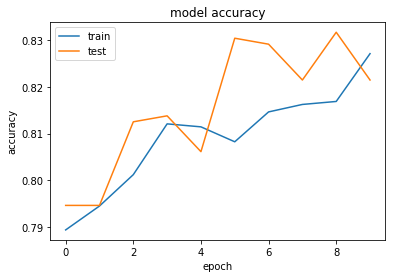

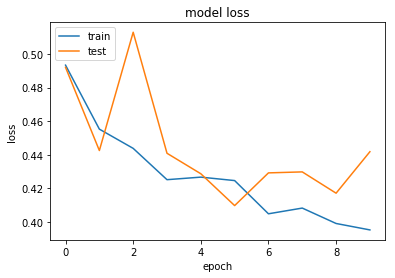

In [14]:
model2 = Sequential()
model2.add(Dense(400, activation='relu', input_shape=(11,)))
model2.add(Dense(600, activation='relu'))
model2.add(Dense(700, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_2 = model2.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_2)

# Model 3 : 3 hidden layers

Train on 3134 samples, validate on 784 samples
Epoch 1/10
11s - loss: 0.5042 - acc: 0.7738 - val_loss: 0.4932 - val_acc: 0.7946
Epoch 2/10
10s - loss: 0.4741 - acc: 0.8025 - val_loss: 0.4432 - val_acc: 0.8138
Epoch 3/10
11s - loss: 0.4608 - acc: 0.8012 - val_loss: 0.4592 - val_acc: 0.8189
Epoch 4/10
11s - loss: 0.4483 - acc: 0.8066 - val_loss: 0.5026 - val_acc: 0.8087
Epoch 5/10
11s - loss: 0.4460 - acc: 0.8092 - val_loss: 0.4522 - val_acc: 0.8202
Epoch 6/10
11s - loss: 0.4408 - acc: 0.8117 - val_loss: 0.4881 - val_acc: 0.8304
Epoch 7/10
11s - loss: 0.4456 - acc: 0.8159 - val_loss: 0.4528 - val_acc: 0.8138
Epoch 8/10
11s - loss: 0.4349 - acc: 0.8184 - val_loss: 0.4421 - val_acc: 0.8355
Epoch 9/10
11s - loss: 0.4297 - acc: 0.8191 - val_loss: 0.4471 - val_acc: 0.8367
Epoch 10/10
11s - loss: 0.4331 - acc: 0.8255 - val_loss: 0.4982 - val_acc: 0.7832
Epoch 00009: early stopping


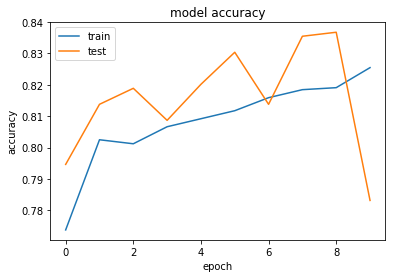

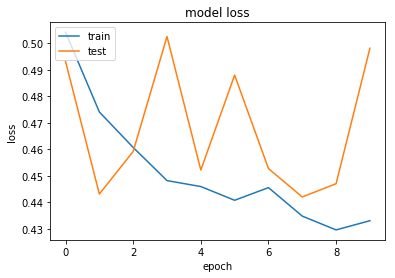

In [15]:
model3 = Sequential()
model3.add(Dense(400, activation='relu', input_shape=(11,)))
model3.add(Dense(600, activation='relu'))
model3.add(Dense(700, activation='relu'))
model3.add(Dense(800, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_3 = model3.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_3)

# Model 4 : 4 hidden layers

Train on 3134 samples, validate on 784 samples
Epoch 1/10
16s - loss: 0.5257 - acc: 0.7837 - val_loss: 0.5610 - val_acc: 0.7832
Epoch 2/10
14s - loss: 0.4809 - acc: 0.7945 - val_loss: 0.5032 - val_acc: 0.8125
Epoch 3/10
15s - loss: 0.4707 - acc: 0.7993 - val_loss: 0.4577 - val_acc: 0.8138
Epoch 4/10
16s - loss: 0.4738 - acc: 0.7894 - val_loss: 0.5757 - val_acc: 0.7538
Epoch 5/10
16s - loss: 0.4685 - acc: 0.7974 - val_loss: 0.5073 - val_acc: 0.8036
Epoch 6/10
16s - loss: 0.4581 - acc: 0.7951 - val_loss: 0.5014 - val_acc: 0.7232
Epoch 00005: early stopping


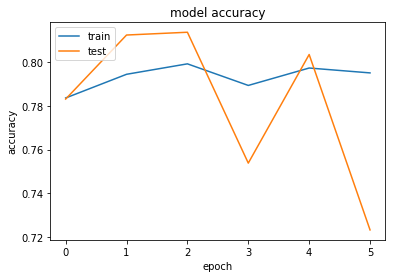

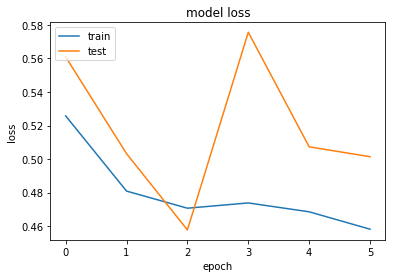

In [16]:
model4 = Sequential()
model4.add(Dense(400, activation='relu', input_shape=(11,)))
model4.add(Dense(600, activation='relu'))
model4.add(Dense(700, activation='relu'))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(3, activation='softmax'))
model4.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_4 = model4.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_4)

# Model 5 : 5 hidden layers

In [ ]:
model5 = Sequential()
model5.add(Dense(400, activation='relu', input_shape=(11,)))
model5.add(Dense(600, activation='relu'))
model5.add(Dense(700, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(3, activation='softmax'))
model5.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_5 = model5.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_5)

Train on 3134 samples, validate on 784 samples
Epoch 1/10
